In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. 16 x 16 dim Encoding

In [2]:
def get_angles(pos, d_model):
    np.random.seed(11)
    angles = np.random.randn(d_model//2)*2*np.pi
    angle_rates = np.repeat(angles,2)
    return pos * angle_rates

def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                            d_model)
    
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    
    pos_encoding  = angle_rads[np.newaxis, ...]
    
    return pos_encoding

In [3]:
tokens = 16
dimensions = 16

pos_encoding = positional_encoding(tokens, dimensions)

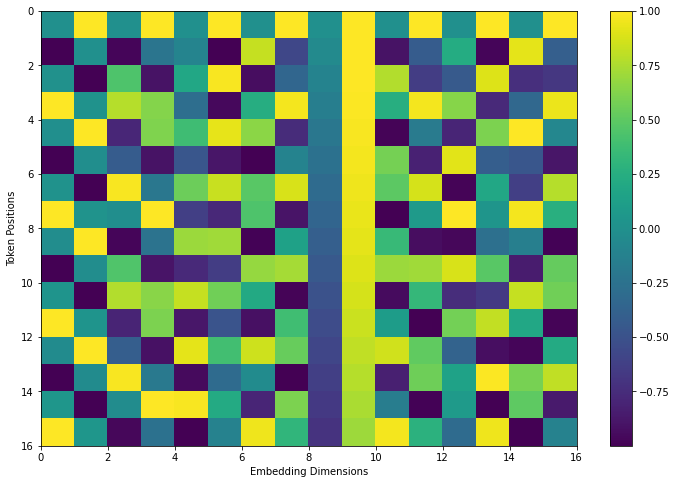

In [4]:
plt.figure(figsize=(12,8))
plt.pcolormesh(pos_encoding[0], cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim(0, dimensions)
plt.ylabel('Token Positions')
plt.ylim(tokens, 0)
plt.colorbar()
plt.show()

# 2. Gram Schmidt Orthogonalization

In [5]:
# Norms of all Encodings
b_norm = []
for i in range(len(pos_encoding[0])):
    b_norm.append(np.linalg.norm(np.transpose(pos_encoding[0])[i]))
print('ALL ENCODING NORMS \n',b_norm)
print('\n')

# Get Dot product of all Encodings (Must be equal to 0 to be orthogonal)
print('ALL DOT PRODUCTS \n', np.dot(pos_encoding[0], np.transpose(pos_encoding[0])))

ALL ENCODING NORMS 
 [2.8281783626775563, 2.828675864937957, 2.8176109140330126, 2.8392021303743156, 2.7206559616279025, 2.93223995240133, 2.8380312412041593, 2.8187902855567635, 1.7174190128585938, 3.6125436930605854, 2.8106886019012784, 2.8460550913751193, 2.6316597223247595, 3.0123690188775956, 2.8317216950206285, 2.825128712457097]


ALL DOT PRODUCTS 
 [[ 8.         -2.59237241 -0.69746027  2.77670564  3.11736918 -3.05416653
   3.2923754   0.66505249  0.3418244   1.77812308  0.32691725  0.23068454
   1.62925707  1.5950497  -1.28330888  1.80730714]
 [-2.59237241  8.         -2.59237241 -0.69746027  2.77670564  3.11736918
  -3.05416653  3.2923754   0.66505249  0.3418244   1.77812308  0.32691725
   0.23068454  1.62925707  1.5950497  -1.28330888]
 [-0.69746027 -2.59237241  8.         -2.59237241 -0.69746027  2.77670564
   3.11736918 -3.05416653  3.2923754   0.66505249  0.3418244   1.77812308
   0.32691725  0.23068454  1.62925707  1.5950497 ]
 [ 2.77670564 -0.69746027 -2.59237241  8.   

The matrix should be the identity matrix for it to be orthogonal and as shown above it is not an identity therefore it is not orthogonal.

The first vector shows that all the basis vectors are not unit vectors. With this we can say that it is also not orthonormal

In [6]:
def gs(X):
    Q,R = np.linalg.qr(X)
    return Q

In [7]:
GS_pos_encoding = gs(pos_encoding[0])

# Norms of all Encodings
GS_b_norm = []
for i in range(len(GS_pos_encoding)):
    GS_b_norm.append(np.linalg.norm(np.transpose(GS_pos_encoding)[i]))
print('ALL ENCODING NORMS \n',GS_b_norm)
print('\n')

# Get Dot product of all Encodings (Must be equal to 0 to be orthogonal)
print('ALL DOT PRODUCTS \n', np.dot(GS_pos_encoding, np.transpose(GS_pos_encoding)))

ALL ENCODING NORMS 
 [1.0, 1.0, 0.9999999999999998, 0.9999999999999999, 1.0000000000000002, 0.9999999999999998, 1.0, 1.0, 0.9999999999999998, 1.0000000000000002, 0.9999999999999998, 1.0000000000000002, 1.0, 1.0, 1.0000000000000002, 1.0]


ALL DOT PRODUCTS 
 [[ 1.00000000e+00  7.01648027e-17 -1.17209019e-16  1.27735539e-16
  -4.34672076e-17  5.92464114e-17  5.72574122e-17  5.52149565e-17
  -1.46503013e-17  3.00701279e-18 -1.00427803e-16  2.26476566e-16
   1.05824522e-16  3.16586526e-17 -1.73498857e-16 -7.10442457e-17]
 [ 7.01648027e-17  1.00000000e+00 -2.15110542e-16  2.76727227e-16
  -8.96369315e-17  6.44384667e-18  1.73379549e-16  6.27311339e-18
  -3.76672690e-17  7.78686986e-17  5.99283073e-17  2.31087227e-17
   5.65584201e-17 -2.10119198e-17 -1.27987500e-16 -1.90659069e-17]
 [-1.17209019e-16 -2.15110542e-16  1.00000000e+00  2.72293046e-16
   1.59138722e-16  6.33111759e-17  3.54463292e-17  8.60600318e-17
   6.22930238e-17  1.78170775e-16  1.19202831e-16 -1.75021638e-16
   5.29623280e

The first vector shows that all the basis vectors achieved via Gram-Schmidt has are all unit vectors.

The matrix shows all the dot products of each basis vectors to each other. The diagonal elements being 1 also shows that the dot product of the basis vector to itself is 1 further proving that the basis vectors are unit vectors. All other elements of the matrix are approximately zero showing that each basis vector is orthogonal to another vector.

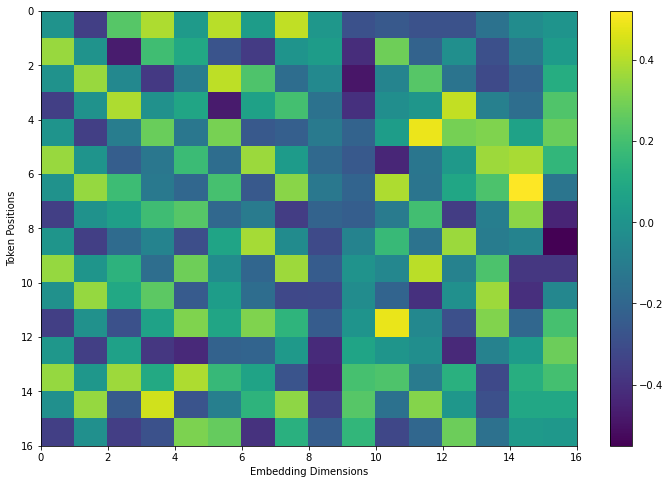

In [8]:
plt.figure(figsize=(12,8))
plt.pcolormesh(GS_pos_encoding, cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim(0, dimensions)
plt.ylabel('Token Positions')
plt.ylim(tokens, 0)
plt.colorbar()
plt.show()